# Appartment Rent Prediction

Libraries Importation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import math
import re
import sklearn
from joblib import dump
from joblib import load
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

1.Reading and Exploring the dataset

In [2]:
df=pd.read_csv("ApartmentRentPrediction.csv")
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5508832632,housing/rent/apartment,"Two BR - $1,194/mo - Apartment - come and see ...","Come experience. in Cary, NC offering recently...","Clubhouse,Fireplace,Gym,Patio/Deck,Playground,...",2.5,2.0,USD,No,Thumbnail,...,"$1,194",Monthly,800,NaN,Cary,NC,35.7585,-78.7783,RentDigs.com,1568755960
1,5664576849,housing/rent/apartment,One BR 640 West Wilson Street,This unit is located at 640 West Wilson Street...,"Cable or Satellite,Dishwasher,Elevator,Garbage...",1.0,1.0,USD,No,Thumbnail,...,"$1,370",Monthly,795,640 West Wilson St,Madison,WI,43.0724,-89.4003,RentLingo,1577015508
2,5668619365,housing/rent/apartment,One BR 2777 Sw Archer Rd,"This unit is located at 2777 Sw Archer Rd, Gai...","Basketball,Cable or Satellite,Dishwasher,Inter...",1.0,1.0,USD,No,Thumbnail,...,"$1,009",Monthly,560,2777 SW Archer Road,Gainesville,FL,29.6533,-82.3656,RentLingo,1577358921
3,5668632604,housing/rent/apartment,One BR 534-542 Park Avenue,"This unit is located at 534-542 Park Avenue, O...",NaN,1.0,1.0,USD,No,Thumbnail,...,$695,Monthly,600,534-542 Park Ave,Omaha,NE,41.2562,-96.0404,RentLingo,1577359849
4,5668637441,housing/rent/apartment,Three BR 2216 S Palm Grove Ave,"This unit is located at 2216 S Palm Grove Ave,...",NaN,3.0,3.0,USD,No,Thumbnail,...,"$3,695",Monthly,1600,2216 S Palm Grove Avenue,Los Angeles,CA,34.0372,-118.2972,RentLingo,1577360159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,5509251724,housing/rent/apartment,Prominence Apartments Two BR Luxury Apartment ...,Price from: 1158. Your hunt for apartments to ...,"Clubhouse,Gym,Patio/Deck,Pool",1.0,2.0,USD,No,Thumbnail,...,"$1,158",Monthly,875,NaN,New London,CT,41.3498,-72.1062,RentDigs.com,1568781008
8996,5668612787,housing/rent/apartment,One BR 10001 Ne 1st St,"This unit is located at 10001 Ne first St, Bel...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,035",Monthly,824,10001 NE 1st St,Bellevue,WA,47.5988,-122.1507,RentLingo,1577358501
8997,5668617853,housing/rent/apartment,Two BR 95 E 2nd St,"This unit is located at 95 E second St, Fond D...","Parking,Storage",1.0,2.0,USD,No,Thumbnail,...,$424,Monthly,844,95 E 2nd St,Fond Du Lac,WI,43.7815,-88.4411,RentLingo,1577358818
8998,5509093066,housing/rent/apartment,Pico Rivera - superb Apartment nearby fine din...,Top Rated by Yelp and 5 yrs in a Row! Style an...,"AC,Clubhouse,Dishwasher,Gated,Gym,Internet Acc...",1.0,2.0,USD,No,Thumbnail,...,"$1,417",Monthly,489,NaN,Pico Rivera,CA,33.9883,-118.0875,RentDigs.com,1568772954


2.Diving into the dataset (Analyzing each column)

In [3]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} unique values")

id: 9000 unique values
category: 3 unique values
title: 8441 unique values
body: 8969 unique values
amenities: 2093 unique values
bathrooms: 14 unique values
bedrooms: 10 unique values
currency: 1 unique values
fee: 1 unique values
has_photo: 3 unique values
pets_allowed: 3 unique values
price: 1646 unique values
price_display: 1647 unique values
price_type: 3 unique values
square_feet: 1682 unique values
address: 6016 unique values
cityname: 1497 unique values
state: 50 unique values
latitude: 2257 unique values
longitude: 2254 unique values
source: 11 unique values
time: 5886 unique values


In [4]:
####Checking the type of each column
df.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price              int64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

In [5]:
###performing statistical analysis
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.000000e+03,8970.000000,8993.000000,9000.000000,9000.000000,8993.00000,8993.000000,9.000000e+03
mean,5.623668e+09,1.380769,1.744023,1487.286222,947.138667,37.67689,-94.778612,1.574906e+09
std,7.007402e+07,0.616171,0.942446,1088.561190,668.806214,5.51527,15.769232,3.755142e+06
min,5.508654e+09,1.000000,0.000000,200.000000,106.000000,21.31550,-158.022100,1.568744e+09
25%,5.509250e+09,1.000000,1.000000,950.000000,650.000000,33.66200,-101.858700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1275.000000,802.000000,38.75550,-93.707700,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.34980,-82.446800,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.59400,-70.191600,1.577362e+09


In [6]:
X = df.drop(['price_display'], axis=1)
Y = pd.DataFrame(df['price_display'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

3.Preprocessing with different techniques

I. Data Cleaning (Handling Missing Values, Duplicates, Incorrect formats (using different techniques in replacing or dropping))

In [8]:
####Nulls
X_train.isna().sum()

id                 0
category           0
title              0
body               0
amenities       2193
bathrooms         20
bedrooms           4
currency           0
fee                0
has_photo          0
pets_allowed    2625
price              0
price_type         0
square_feet        0
address         2068
cityname          47
state             47
latitude           5
longitude          5
source             0
time               0
dtype: int64

In [9]:
####Duplicates
duplicates = X_train[X_train.duplicated()]

if duplicates.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicates)

No duplicate rows found.


In [10]:
#bathrooms and bedrooms since there are low number of missing values mean or mode replacement or we can drop them
X_train['bedrooms']=X_train['bedrooms'].fillna(X_train['bedrooms'].mode().iloc[0])
X_train['bathrooms']=X_train['bathrooms'].fillna(X_train['bathrooms'].mode().iloc[0])

In [11]:
X_train['pets_allowed']

7581          NaN
8484          NaN
6215          NaN
6884         Dogs
3647    Cats,Dogs
          ...    
5734          NaN
5191          NaN
5390    Cats,Dogs
860          Cats
7270          NaN
Name: pets_allowed, Length: 6300, dtype: object

In [12]:
X_train['pets_allowed'] = X_train['pets_allowed'].fillna('No').apply(lambda x: 'Yes' if x != 'No' else x)
X_train['pets_allowed']
#Converting any pets to Yes and Missing Values to No
#Encode it to 0 and 1

7581     No
8484     No
6215     No
6884    Yes
3647    Yes
       ... 
5734     No
5191     No
5390    Yes
860     Yes
7270     No
Name: pets_allowed, Length: 6300, dtype: object

In [13]:
#Bathrooms has some floating points which must be integer so we round it up
X_train['bathrooms'] = X_train['bathrooms'].apply(lambda x: math.ceil(x))
X_train['bathrooms']

7581    1
8484    1
6215    3
6884    3
3647    1
       ..
5734    1
5191    1
5390    1
860     1
7270    1
Name: bathrooms, Length: 6300, dtype: int64

In [14]:
#Bedrooms has no float values but its datatype float we convert it also
X_train['bedrooms'] = X_train['bedrooms'].astype(np.int64)

In [15]:
####Long and Lat columns we can fill NaN with the mean.
X_train['longitude'] = X_train['longitude'].fillna(X_train['longitude'].mean())
X_train['latitude'] = X_train['latitude'].fillna(X_train['latitude'].mean())

In [16]:
X_train['cityname']=X_train['cityname'].fillna(X_train['cityname'].mode().iloc[0])
X_train['state']=X_train['state'].fillna(X_train['state'].mode().iloc[0])

In [17]:
###address
X_train['address']=X_train['address'].fillna("Unknown")


In [18]:
X_train['amenities'] = X_train['amenities'].fillna(0)

In [19]:
X_train.isna().sum()

id              0
category        0
title           0
body            0
amenities       0
bathrooms       0
bedrooms        0
currency        0
fee             0
has_photo       0
pets_allowed    0
price           0
price_type      0
square_feet     0
address         0
cityname        0
state           0
latitude        0
longitude       0
source          0
time            0
dtype: int64

In [20]:
y_train['price_display']
#Format is not clear

7581    $1,145 
8484    $1,002 
6215    $9,500 
6884    $3,150 
3647      $736 
         ...   
5734    $2,400 
5191      $895 
5390    $1,025 
860     $1,200 
7270    $2,125 
Name: price_display, Length: 6300, dtype: object

In [21]:
y_train['price_display'] = y_train['price_display'].str.replace(r'[^0-9.]', '', regex=True).astype(np.int64)
y_train['price_display']

7581    1145
8484    1002
6215    9500
6884    3150
3647     736
        ... 
5734    2400
5191     895
5390    1025
860     1200
7270    2125
Name: price_display, Length: 6300, dtype: int64

# Note : We must preprocess all columns even if we will drop them

Processing numerical features 

In [22]:
##id column can be mapped to index 0 till 8999 (useless it is integer anyways and unique and we won't use it)
##we just do it to make it look easier
unique_ids = X_train['id'].unique()
id_mapping = {original_id: new_id for new_id, original_id in enumerate(unique_ids)}
X_train['id'] = X_train['id'].map(id_mapping)
X_train['id']

7581       0
8484       1
6215       2
6884       3
3647       4
        ... 
5734    6295
5191    6296
5390    6297
860     6298
7270    6299
Name: id, Length: 6300, dtype: int64

In [23]:
#### time column
max_time = X_train['time'].max()
min_time = X_train['time'].min()
print(f"Maximum time in : {max_time}")
print(f"Minimum time in : {min_time}")

Maximum time in : 1577362186
Minimum time in : 1568743976


In [24]:
X_train['time']=X_train['time']/X_train['time'].min()

In [25]:
X_train['time']

7581    1.005492
8484    1.000005
6215    1.005492
6884    1.005492
3647    1.005492
          ...   
5734    1.005492
5191    1.005272
5390    1.000018
860     1.005273
7270    1.005492
Name: time, Length: 6300, dtype: float64

In [26]:
X_train['bedrooms'].value_counts()[0]

121

In [27]:
X_train['bedrooms']=X_train['bedrooms'].replace(0,1)

Processing categorical features

In [28]:
######Extracting Price Info from body column######
def extract_price(text):
    prices = re.findall(r'\$(\d+(?:\.\d+)?)', text)
    if prices:
        return prices[0]
    else:
        return 0

X_train['extracted_price'] = X_train['body'].apply(extract_price)

In [29]:
def extract_price_df(text):
    if isinstance(text, str):  # Check if text is a string
        prices = re.findall(r'\$(\d+(?:\.\d+)?)', text)
        if prices:
            return prices[0]
    return 0

In [30]:
X_train['extracted_price']=X_train['extracted_price'].astype(np.float64)
X_train['extracted_price']

7581    1145.0
8484       0.0
6215    9500.0
6884    3150.0
3647     736.0
         ...  
5734    2400.0
5191     895.0
5390       0.0
860     1200.0
7270    2125.0
Name: extracted_price, Length: 6300, dtype: float64

In [31]:
d1=X_train['cityname'].mode().iloc[0]
d2=X_train['state'].mode().iloc[0]
d3=X_train['state']
d4=X_train['cityname']
d5 = X_train['bathrooms'].mode().iloc[0]
dfff=X_train[X_train['cityname']==d1]
mostcity = dfff['extracted_price'].mean()
dffff=X_train[X_train['state']==d2]
moststate = dffff['extracted_price'].mean()
dfBath=X_train[X_train['bathrooms']==d5]
mostBath = dfBath['extracted_price'].mean()
d5=X_train['square_feet'].mean()
mostBath

904.8274388796582

In [32]:
####amenities column we fill NaN with 0 and we count each amenity.
##  Ex: Gym , Parking , Pool = 3
def encode_amenities(value):
    items = value.split(',') if isinstance(value, str) else []
    count=len(items)
    return count


if X_train['amenities'].dtype == object:
    X_train['amenities'] = X_train['amenities'].apply(encode_amenities)


X_train['amenities']

7581    0
8484    4
6215    0
6884    0
3647    9
       ..
5734    2
5191    1
5390    2
860     6
7270    6
Name: amenities, Length: 6300, dtype: int64

In [33]:
####Replacing nan with 0 then with the mean or mode which is equal 3.
X_train.loc[X_train['amenities'] == 0, 'amenities'] = 3
X_train['amenities']

7581    3
8484    4
6215    3
6884    3
3647    9
       ..
5734    2
5191    1
5390    2
860     6
7270    6
Name: amenities, Length: 6300, dtype: int64

In [34]:
X_train['amenities'].value_counts()

amenities
3     2868
2      582
1      513
4      511
5      409
6      323
7      257
8      207
9      180
10     167
11     128
12      73
13      40
14      26
15       8
16       5
17       2
18       1
Name: count, dtype: int64

In [35]:
X_train['state'].value_counts()

state
TX    1151
CA     593
WA     328
NC     276
MD     250
NJ     233
FL     222
GA     218
CO     209
WI     203
IL     189
OH     182
MO     154
MN     151
IN     150
OR     125
IA     124
VA     119
MI     109
MA     108
OK     103
PA      98
NV      80
AZ      80
NE      69
ND      66
CT      66
TN      62
SC      56
NY      51
DC      49
KS      49
UT      48
LA      46
AR      43
NH      41
SD      41
AL      39
AK      31
KY      29
ID      11
HI       9
RI       8
VT       7
MT       6
NM       6
DE       5
MS       5
WV       2
Name: count, dtype: int64

In [36]:
desired_state='LA'
state_df = X_train[X_train['state'] == desired_state]
max_price = state_df['extracted_price'].max()
min_price = state_df['extracted_price'].min()
print(f"Maximum price in {desired_state}: {max_price}")
print(f"Minimum price in {desired_state}: {min_price}")

Maximum price in LA: 2300.0
Minimum price in LA: 0.0


In [37]:
#grouping the state according to its names and replacing with the avg price of this state name
state_encoding = X_train.groupby('state')['extracted_price'].mean().reset_index()
state_encoding.columns = ['state', 'state_price_mean']
X_train = pd.merge(X_train, state_encoding, on='state', how='left')
X_train['state']=X_train['state_price_mean']
X_train.drop(['state_price_mean'], axis=1, inplace=True)

In [38]:
#grouping the city according to its names and replacing with the avg price of this city name
city_encoding = X_train.groupby('cityname')['extracted_price'].mean().reset_index()
city_encoding.columns = ['cityname', 'city_price_mean']
X_train = pd.merge(X_train, city_encoding, on='cityname', how='left')
X_train['cityname']=X_train['city_price_mean']
X_train.drop(['city_price_mean'], axis=1, inplace=True)

In [39]:
#####Renaming them######
X_train = X_train.rename(columns={'cityname': 'CityavgRentprice', 'state': 'StateavgRentprice'})

In [40]:
X_train['source'].value_counts()

source
RentLingo            4392
RentDigs.com         1711
ListedBuy             116
RealRentals            37
GoSection8             21
Listanza               12
RENTOCULAR              9
RENTCafé                1
Real Estate Agent       1
Name: count, dtype: int64

In [41]:
X_train['price_type'].value_counts()
##### We convert them to Monthly

price_type
Monthly           6298
Monthly|Weekly       1
Weekly               1
Name: count, dtype: int64

In [42]:
X_train['category'].value_counts()
##### We convert them to housing/rent/apartment

category
housing/rent/apartment    6299
housing/rent/home            1
Name: count, dtype: int64

In [43]:
X_train['price_type'] = X_train['price_type'].replace({'Weekly': 'Monthly', 'Monthly|Weekly': 'Monthly'})
X_train['source'] = X_train['source'].replace({'rentbits': 'RentLingo', 'Real Estate Agent': 'RentLingo', 'tenantcloud': 'RentLingo', 'RENTCafé': 'RentLingo'})
X_train['category'] = X_train['category'].replace({'housing/rent/short_term': 'housing/rent/apartment', 'housing/rent/home': 'housing/rent/apartment'})
###After converting we label encode it and we will drop this column as well as it has 1 value

II. Encoding (using the built-in LabelEncoder)

In [44]:
label_encoder = LabelEncoder()
X_train['source'] = label_encoder.fit_transform(X_train['source'])
X_train['price_type'] = label_encoder.fit_transform(X_train['price_type'])
X_train['category'] = label_encoder.fit_transform(X_train['category'])
X_train['address'] = label_encoder.fit_transform(X_train['address'])
X_train['body'] = label_encoder.fit_transform(X_train['body'])
X_train['title'] = label_encoder.fit_transform(X_train['title'])
X_train['pets_allowed'] = label_encoder.fit_transform(X_train['pets_allowed'])
X_train['has_photo'] = label_encoder.fit_transform(X_train['has_photo'])
X_train['fee'] = label_encoder.fit_transform(X_train['fee'])
X_train['currency'] = label_encoder.fit_transform(X_train['currency'])
label_encoder_path = 'le.joblib'
dump(label_encoder, label_encoder_path)

['le.joblib']

In [45]:
df.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price              int64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

In [46]:
###df after encoding
X_train

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,CityavgRentprice,StateavgRentprice,latitude,longitude,source,time,extracted_price
0,0,0,1556,2352,3,1,1,0,0,1,...,0,750,732,1007.800000,918.538662,30.6505,-97.6809,6,1.005492,1145.0
1,1,0,3154,6083,4,1,1,0,0,1,...,0,856,4220,298.714286,632.287500,36.0993,-115.2838,5,1.000005,0.0
2,2,0,4437,3427,3,3,3,0,0,1,...,0,2330,1891,5441.666667,2195.546374,37.4356,-122.1340,6,1.005492,9500.0
3,3,0,4629,4832,3,3,3,0,0,1,...,0,1999,3368,2845.200000,2195.546374,37.6812,-121.7519,6,1.005492,3150.0
4,4,0,1468,2193,9,1,1,0,0,1,...,0,500,560,776.772727,918.538662,32.8212,-96.7853,6,1.005492,736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,6295,0,4673,5116,2,1,3,0,0,1,...,0,1700,3677,2120.592593,958.009146,47.6160,-122.3275,6,1.005492,2400.0
6296,6296,0,1242,1718,1,1,1,0,0,1,...,0,715,51,1091.083333,918.538662,29.8831,-97.9450,6,1.005272,895.0
6297,6297,0,1179,455,2,1,2,0,0,1,...,0,803,4220,594.372549,918.538662,32.7583,-97.0880,5,1.000018,0.0
6298,6298,0,2379,4096,6,1,1,0,0,1,...,0,758,2600,1200.000000,1245.532020,43.0619,-88.4017,6,1.005273,1200.0


III. Assuring no outliers

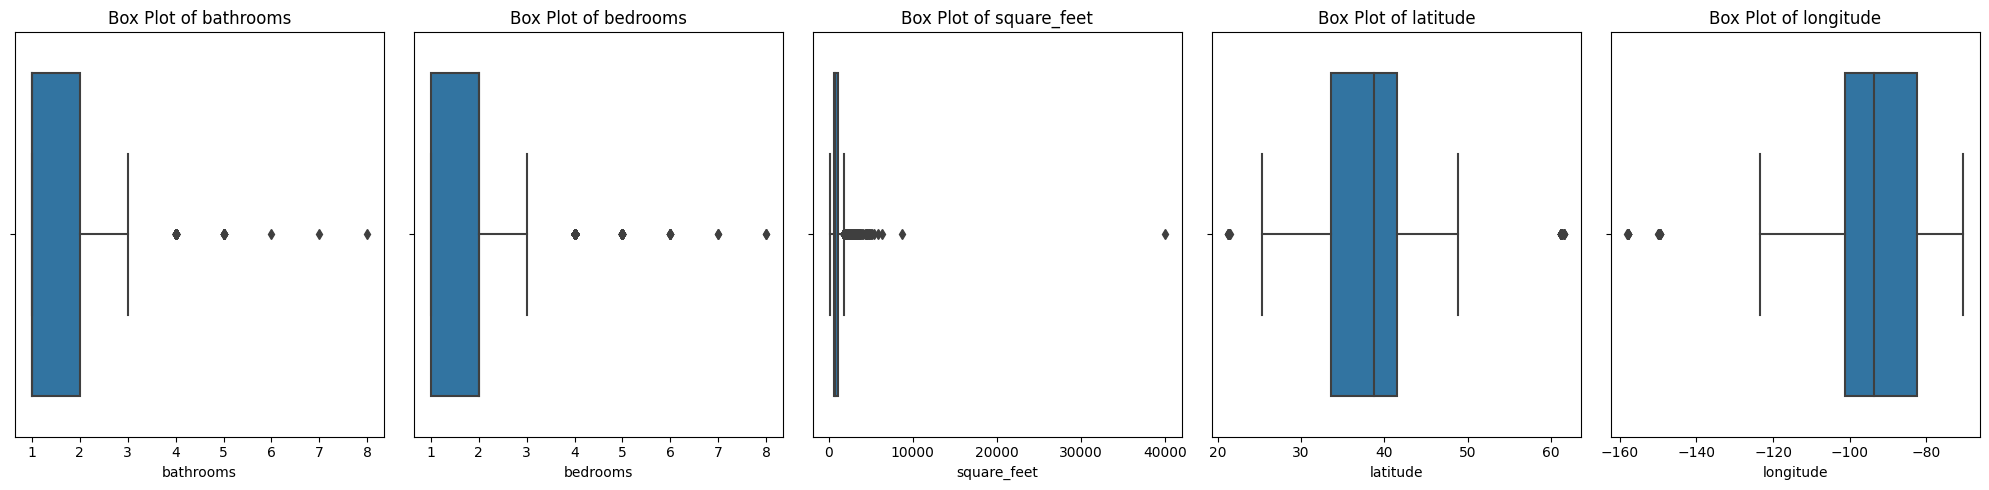

In [47]:
# Select the numerical columns for outlier detection
numerical_columns = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']

fig, axes = plt.subplots(1, len(numerical_columns), figsize=(20, 5), sharey=True)

for idx, column in enumerate(numerical_columns):
    sns.boxplot(data=X_train, x=column, ax=axes[idx])
    
    axes[idx].set_title(f'Box Plot of {column}')


plt.tight_layout()


plt.show()

In [48]:
# Select the numerical columns for outlier detection
numerical_columns = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']
List1lower = []
List1upper =[]
for column in numerical_columns:
   
    z_scores = zscore(X_train[column])

    # Define a threshold for outliers (e.g., Z-score > 3 or < -3)
    threshold = 3

    # Identify outliers
    outliers = np.abs(z_scores) > threshold

    # Replace outliers with the nearest non-outlier value (Winsorization)
    lower_bound = X_train[column][~outliers].min()
    List1lower.append(lower_bound)
    upper_bound = X_train[column][~outliers].max()
    List1upper.append(upper_bound)
    X_train.loc[outliers, column] = np.where(X_train.loc[outliers, column] < lower_bound, lower_bound, X_train.loc[outliers, column])
    X_train.loc[outliers, column] = np.where(X_train.loc[outliers, column] > upper_bound, upper_bound, X_train.loc[outliers, column])


In [49]:
d5=X_train['square_feet'].mean()

In [50]:
X_train.describe() ###after removing outliers

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,CityavgRentprice,StateavgRentprice,latitude,longitude,source,time,extracted_price
count,6300.00000,6300.0,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.0,6300.0,6300.000000,...,6300.0,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000
mean,3149.50000,0.0,2924.444762,3141.198413,4.202063,1.392698,1.744286,0.0,0.0,1.073492,...,0.0,933.161587,2803.625238,1038.411429,1038.411429,37.632537,-94.604263,5.609206,1.003947,1038.411429
std,1818.79768,0.0,1741.903967,1817.429722,2.714077,0.601166,0.867563,0.0,0.0,0.318995,...,0.0,476.411440,1406.929539,810.741509,502.953080,5.366630,15.250706,0.785835,0.002384,1079.744911
min,0.00000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0,0.000000,...,0.0,106.000000,0.000000,0.000000,187.780488,21.315500,-123.328300,0.000000,1.000000,0.000000
25%,1574.75000,0.0,1380.750000,1566.750000,3.000000,1.000000,1.000000,0.0,0.0,1.000000,...,0.0,647.000000,1571.750000,491.000000,718.645933,33.661825,-101.301700,5.000000,1.000024,50.000000
50%,3149.50000,0.0,2954.500000,3140.500000,3.000000,1.000000,2.000000,0.0,0.0,1.000000,...,0.0,802.000000,3143.500000,997.000000,918.538662,38.784750,-93.668900,6.000000,1.005491,950.000000
75%,4724.25000,0.0,4403.250000,4715.250000,5.000000,2.000000,2.000000,0.0,0.0,1.000000,...,0.0,1100.000000,4220.000000,1354.200000,1245.532020,41.507300,-82.479200,6.000000,1.005492,1450.000000
max,6299.00000,0.0,5944.000000,6285.000000,18.000000,3.000000,4.000000,0.0,0.0,2.000000,...,0.0,3077.000000,4223.000000,25000.000000,4210.000000,48.787100,-70.346100,6.000000,1.005494,25000.000000


IV.Columns dropped

In [51]:
###Columns to drop : category, fee , currency , price_type  (as they have only one value) 
##Then drop them
###We can drop title, body as they dont affect the data
###column price might be dropped as we already preprocessed price_display so it is a duplicated column
columns_to_drop = ['id', 'category', 'title', 'body', 'currency', 'fee', 'source', 'time','price','price_type','address']
X_train = X_train.drop(columns=columns_to_drop)

In [52]:
X_train.head(5)

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,square_feet,CityavgRentprice,StateavgRentprice,latitude,longitude,extracted_price
0,3,1,1,1,0,750,1007.800000,918.538662,30.6505,-97.6809,1145.0
1,4,1,1,1,0,856,298.714286,632.287500,36.0993,-115.2838,0.0
2,3,3,3,1,0,2330,5441.666667,2195.546374,37.4356,-122.1340,9500.0
3,3,3,3,1,1,1999,2845.200000,2195.546374,37.6812,-121.7519,3150.0
4,9,1,1,1,1,500,776.772727,918.538662,32.8212,-96.7853,736.0


**V.Feature Engineering**

In [53]:
##############New Feature ALERTTTTT############ AvgAreaPrice
X_train['longitude_range'] = pd.cut(X_train['longitude'], bins=10)
X_train['latitude_range'] = pd.cut(X_train['latitude'], bins=10)


range_means = X_train.groupby(['longitude_range', 'latitude_range'])['extracted_price'].mean()


X_train['AvgAreaPrice'] = X_train.groupby(['longitude_range', 'latitude_range'])['extracted_price'].transform('mean')


X_train.drop(['longitude_range', 'latitude_range'], axis=1, inplace=True)

In [54]:
#########NEW FEATURE ALERT!!!!!!!!!!!!################
X_train['NoOfRooms']=X_train['bathrooms']+X_train['bedrooms']

In [55]:
#########NEW FEATURE ALERT!!!!!!!!!!!!################
X_train['CityStateAvg']=(X_train['CityavgRentprice']+X_train['StateavgRentprice'])/2

In [56]:
#########NEW FEATURE ALERT!!!!!!!!!!!!################
bath_encoding = X_train.groupby('bathrooms')['extracted_price'].mean().reset_index()
bath_encoding.columns = ['bathrooms', 'avgBathroomsPrice']
X_train = pd.merge(X_train, bath_encoding, on='bathrooms', how='left')

In [57]:
#########NEW FEATURE ALERT!!!!!!!!!!!!################
X_train['Trial'] = X_train['CityavgRentprice'] + X_train['square_feet']/2 + X_train['avgBathroomsPrice']/3 +X_train['bedrooms']*20

In [58]:
X_train

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,square_feet,CityavgRentprice,StateavgRentprice,latitude,longitude,extracted_price,AvgAreaPrice,NoOfRooms,CityStateAvg,avgBathroomsPrice,Trial
0,3,1,1,1,0,750,1007.800000,918.538662,30.6505,-97.6809,1145.0,1180.728538,2,963.169331,904.827439,1704.409146
1,4,1,1,1,0,856,298.714286,632.287500,36.0993,-115.2838,0.0,686.243590,2,465.500893,904.827439,1048.323432
2,3,3,3,1,0,2330,5441.666667,2195.546374,37.4356,-122.1340,9500.0,3271.863636,6,3818.606521,2539.069767,7513.023256
3,3,3,3,1,1,1999,2845.200000,2195.546374,37.6812,-121.7519,3150.0,3271.863636,6,2520.373187,2539.069767,4751.056589
4,9,1,1,1,1,500,776.772727,918.538662,32.8212,-96.7853,736.0,819.404762,2,847.655695,904.827439,1348.381874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,2,1,3,1,0,1700,2120.592593,958.009146,47.6160,-122.3275,2400.0,933.599398,4,1539.300869,904.827439,3332.201739
6296,1,1,1,1,0,715,1091.083333,918.538662,29.8831,-97.9450,895.0,1180.728538,2,1004.810998,904.827439,1770.192480
6297,2,1,2,1,1,803,594.372549,918.538662,32.7583,-97.0880,0.0,505.568182,3,756.455606,904.827439,1337.481695
6298,6,1,1,1,1,758,1200.000000,1245.532020,43.0619,-88.4017,1200.0,1389.376176,2,1222.766010,904.827439,1900.609146


In [59]:
y_train

,price_display
7581,1145
8484,1002
6215,9500
6884,3150
3647,736
...,...
5734,2400
5191,895
5390,1025
860,1200


In [60]:
y_train.reset_index(drop=True, inplace=True)

In [61]:
y_train

,price_display
0,1145
1,1002
2,9500
3,3150
4,736
...,...
6295,2400
6296,895
6297,1025
6298,1200


4.Visualizations after preprocessing the features

In [62]:
merged_train = pd.concat([X_train, y_train], axis=1)
correlation_values = merged_train.corr()['price_display'].sort_values(ascending=False)
print(correlation_values)

price_display        1.000000
extracted_price      0.572099
Trial                0.520414
CityavgRentprice     0.430048
CityStateAvg         0.423276
square_feet          0.398110
bathrooms            0.323743
AvgAreaPrice         0.313532
NoOfRooms            0.311724
avgBathroomsPrice    0.304829
StateavgRentprice    0.302777
bedrooms             0.263029
latitude             0.016365
has_photo           -0.008917
pets_allowed        -0.040270
amenities           -0.067867
longitude           -0.172613
Name: price_display, dtype: float64


In [63]:
numerical_columns = ['CityavgRentprice','StateavgRentprice','CityStateAvg','AvgAreaPrice']
list2lower =[]
list2upper =[] 
for column in numerical_columns:
    
    z_scores = zscore(X_train[column])

    # Define a threshold for outliers (e.g., Z-score > 3 or < -3)
    threshold = 3

    # Identify outliers
    outliers = np.abs(z_scores) > threshold

    # Replace outliers with the nearest non-outlier value (Winsorization)
    lower_bound = X_train[column][~outliers].min()
    list2lower.append(lower_bound)
    upper_bound = X_train[column][~outliers].max()
    list2upper.append(upper_bound)
    X_train.loc[outliers, column] = np.where(X_train.loc[outliers, column] < lower_bound, lower_bound, X_train.loc[outliers, column])
    X_train.loc[outliers, column] = np.where(X_train.loc[outliers, column] > upper_bound, upper_bound, X_train.loc[outliers, column])


In [64]:
merged_train = pd.concat([X_train, y_train], axis=1)
correlation_values = merged_train.corr()['price_display'].sort_values(ascending=False)
print(correlation_values)

price_display        1.000000
extracted_price      0.572099
Trial                0.520414
square_feet          0.398110
CityStateAvg         0.356088
CityavgRentprice     0.341757
bathrooms            0.323743
NoOfRooms            0.311724
avgBathroomsPrice    0.304829
StateavgRentprice    0.296705
AvgAreaPrice         0.279977
bedrooms             0.263029
latitude             0.016365
has_photo           -0.008917
pets_allowed        -0.040270
amenities           -0.067867
longitude           -0.172613
Name: price_display, dtype: float64


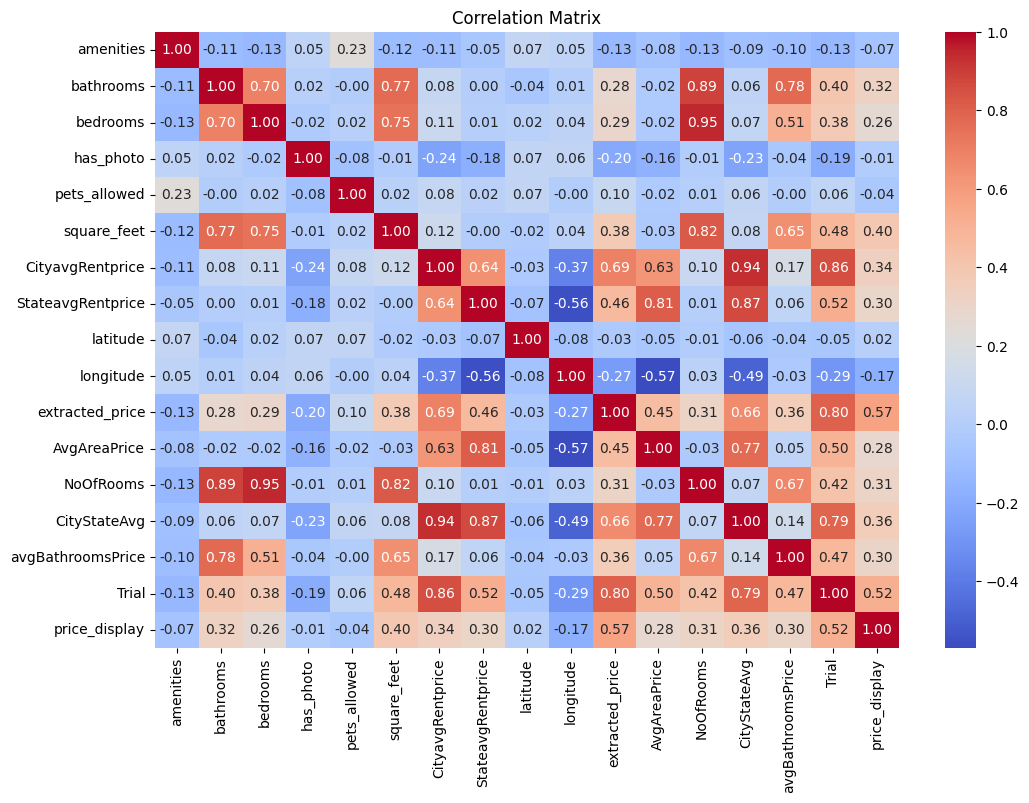

In [65]:
#####To see all relations
# Correlation matrix
corr = merged_train.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

5.Feature Selection based on plots, correlations , etc.

Index(['bathrooms', 'square_feet', 'CityavgRentprice', 'extracted_price',
       'CityStateAvg', 'Trial', 'price_display'],
      dtype='object')


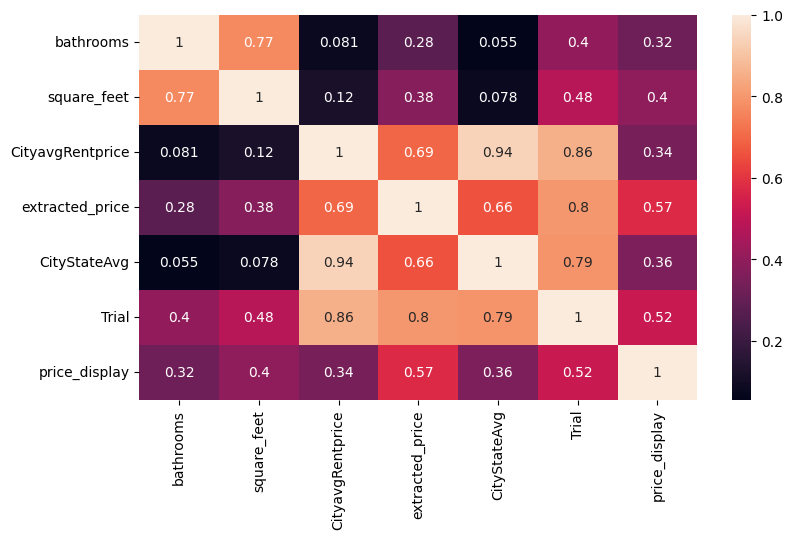

,bathrooms,square_feet,CityavgRentprice,extracted_price,CityStateAvg,Trial
0,1,750,1007.800000,1145.0,963.169331,1704.409146
1,1,856,298.714286,0.0,465.500893,1048.323432
2,3,2330,3459.250000,9500.0,2810.273187,7513.023256
3,3,1999,2845.200000,3150.0,2520.373187,4751.056589
4,1,500,776.772727,736.0,847.655695,1348.381874
...,...,...,...,...,...,...
6295,1,1700,2120.592593,2400.0,1539.300869,3332.201739
6296,1,715,1091.083333,895.0,1004.810998,1770.192480
6297,1,803,594.372549,0.0,756.455606,1337.481695
6298,1,758,1200.000000,1200.0,1222.766010,1900.609146


In [66]:
#####getting top features that affect the target to start using them in the model
corr=merged_train.corr()
top_feature = corr.index[corr['price_display'] > 0.32]
print(top_feature)
plt.subplots(figsize=(9, 5))
top_corr = merged_train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Y = pd.DataFrame(y_train['price_display'])
X = X_train[['bathrooms', 'square_feet', 'CityavgRentprice', 'extracted_price',
       'CityStateAvg', 'Trial']]
# X = X.drop(['CityStateAvg'],axis=1)
X ################ Features used in the models

In [67]:
Y
########Target

,price_display
0,1145
1,1002
2,9500
3,3150
4,736
...,...
6295,2400
6296,895
6297,1025
6298,1200


6.Splitting dataset and perform crossvalidation or train test split

In [68]:
#############################scaling the features####################
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
s_scaler_path = 'sc_regr.joblib'

dump(sc_X, s_scaler_path)

['sc_regr.joblib']

In [70]:
merged_test = pd.concat([X_test, y_test], axis=1)

In [71]:
X_test,y_test=preprocess_data(merged_test)

C:\Users\20127\AppData\Local\Temp\ipykernel_24128\1848221341.py:85: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  new = pd.merge(new, bath_encoding, on='bathrooms', how='left')


In [72]:
X_test

array([[ 1.01028589,  0.26205987,  0.2999142 , -0.96179555,  0.08487688,
         0.27624786],
       [-0.65327948,  0.97998375,  0.2999142 ,  0.52015355,  0.08487688,
         0.41504461],
       [-0.65327948, -0.63639456,  0.2999142 , -0.96179555,  0.08487688,
        -0.0173785 ],
       ...,
       [ 1.01028589,  0.09832285,  0.2999142 , -0.96179555,  0.08487688,
         0.23460712],
       [-0.65327948, -0.48945108,  0.2999142 , -0.96086933,  0.08487688,
         0.0199914 ],
       [ 1.01028589,  0.40900336,  0.2999142 ,  0.14874006,  0.08487688,
         0.33497199]])

In [73]:
y_test

0       1845
1       1600
2       1160
3        795
4       1550
        ... 
2695    1897
2696    1309
2697    1750
2698    1475
2699    1199
Name: price_display, Length: 2700, dtype: int64

In [74]:
Y = Y.values.reshape(-1, 1)
y_test=y_test.values.reshape(-1, 1)

7.Applying Two Different Regression Models or more (Built-in and not Built-in) Performing GD to minimize the error (Extras: Hypertuning)

**Model I : Linear Regression**

In [75]:
# Y_np = Y.values.reshape(-1, 1)

cls = linear_model.LinearRegression()

cv_predictions = cross_val_predict(cls, X, Y, cv=5)


mae_lrcv = metrics.mean_absolute_error(Y, cv_predictions)
mse_lrcv = metrics.mean_squared_error(Y, cv_predictions)
rmse_lrcv = np.sqrt(mse_lrcv)
r2_cv = r2_score(Y, cv_predictions)
r2_scorescv = cross_val_score(cls, X, Y, cv=5, scoring='r2')
mean_r2_scores_cv=np.mean(r2_scorescv)

print('Cross-Validated Metrics:')
print('MAE:', mae_lrcv)
print('MSE:', mse_lrcv)
print('RMSE:', rmse_lrcv)
print('R2 Score:', r2_cv)



print('Cross-Validated R2 Scores:', r2_scorescv)
print('Mean R2 Score:',mean_r2_scores_cv )
print('Standard Deviation of R2 Scores:', np.std(r2_scorescv))

cls.fit(X, Y)

r2_training_cv = cls.score(X, Y)
print('Training R2 Score:', r2_training_cv)


Cross-Validated Metrics:
MAE: 442.9727585371034
MSE: 815533.0487997375
RMSE: 903.0686844308894
R2 Score: 0.388647610387602
Cross-Validated R2 Scores: [0.71932253 0.23088807 0.50220902 0.39145078 0.38914893]
Mean R2 Score: 0.4466038654861847
Standard Deviation of R2 Scores: 0.16145813332054665
Training R2 Score: 0.3975031170308633


In [76]:
#############with the train test split##########
# Y= Y.values.reshape(-1, 1)
cls = linear_model.LinearRegression()
cls.fit(X,Y)
train_prediction= cls.predict(X)
test_prediction= cls.predict(X_test)
mae_lr = metrics.mean_absolute_error(y_test, test_prediction)
mse_lr =  metrics.mean_squared_error(y_test, test_prediction)
rmse_lr =  np.sqrt(mse_lr)
print('MAE:', mae_lr)
print('MSE:', mse_lr)
print('RMSE:', rmse_lr)
score1 = r2_score(Y,train_prediction)
print("The accuracy of train model is {}%".format(round(score1, 5) *100))
score11 = r2_score(y_test,test_prediction)
print("The accuracy of test model is {}%".format(round(score11, 5) *100))
print('Train Mean Square Error', metrics.mean_squared_error(Y, train_prediction))
print('Test Mean Square Error', metrics.mean_squared_error(y_test, test_prediction))

MAE: 425.93163932539073
MSE: 465155.8054749959
RMSE: 682.02331739831
The accuracy of train model is 39.75%
The accuracy of test model is 44.41%
Train Mean Square Error 803719.962837934
Test Mean Square Error 465155.8054749959


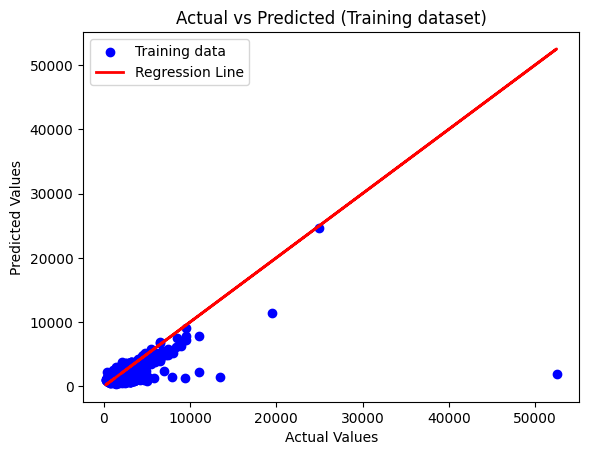

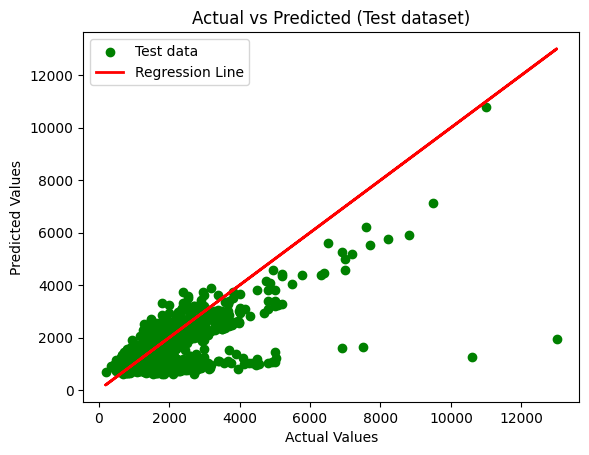

In [77]:
plt.scatter(Y, train_prediction, color='blue', label='Training data')

plt.plot(Y, Y, color='red', linewidth=2, label='Regression Line')

plt.title('Actual vs Predicted (Training dataset)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


plt.scatter(y_test, test_prediction, color='green', label='Test data')

plt.plot(y_test, y_test, color='red', linewidth=2, label='Regression Line')

plt.title('Actual vs Predicted (Test dataset)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

**Model II : Ridge Regression**

In [78]:
# Y= Y.values.reshape(-1, 1)
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X,Y)
test_predict= ridgeReg.predict(X_test)
train_predict= ridgeReg.predict(X)
mae_ridge = metrics.mean_absolute_error(y_test, test_predict)
mse_ridge =  metrics.mean_squared_error(y_test, test_predict)
rmse_ridge =  np.sqrt(mse_ridge)
print('MAE:', mae_ridge)
print('MSE:', mse_ridge)
print('RMSE:', rmse_ridge)
score5 = r2_score(Y,train_predict)
print("The accuracy of train model is {}%".format(round(score5, 5) *100))
score55 = r2_score(y_test,test_predict)
print("The accuracy of test model is {}%".format(round(score55, 5) *100))
print('Train Mean Square Error', metrics.mean_squared_error(Y, train_predict))
print('Test Mean Square Error', metrics.mean_squared_error(y_test, test_predict))

MAE: 426.36501308848096
MSE: 464259.17901068466
RMSE: 681.3656720225085
The accuracy of train model is 39.747%
The accuracy of test model is 44.517%
Train Mean Square Error 803765.7414655044
Test Mean Square Error 464259.17901068466


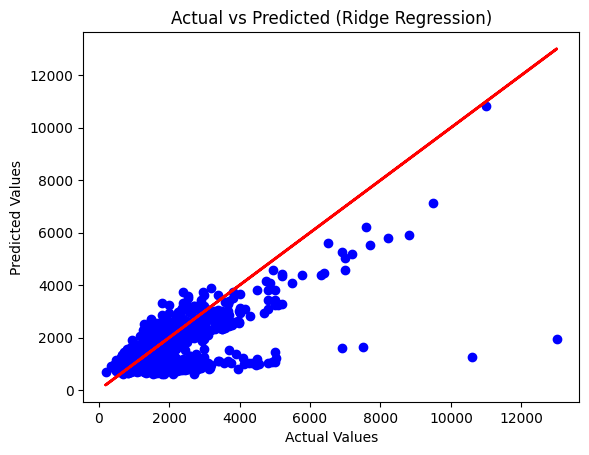

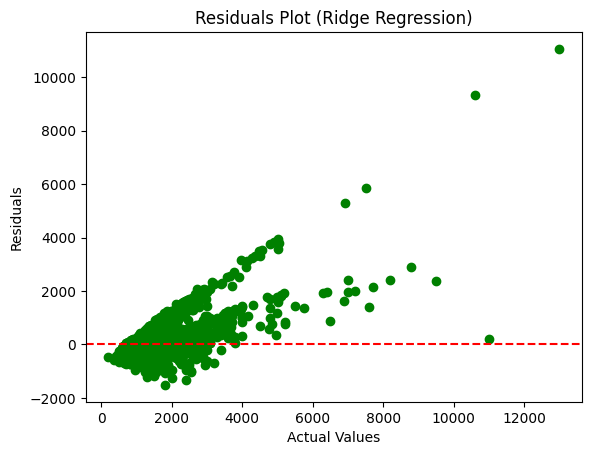

In [79]:
plt.scatter(y_test, test_predict, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Actual vs Predicted (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


residuals_ridge = y_test - test_predict

plt.scatter(y_test, residuals_ridge, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

**Model III : Polynomial Regression**

In [80]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X)
X_test_poly = poly_features.fit_transform(X_test)
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, Y)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predicted = poly_model.predict(X_test_poly)
mae_poly = metrics.mean_absolute_error(y_test, y_test_predicted)
mse_poly =  metrics.mean_squared_error(y_test, y_test_predicted)
rmse_poly =  np.sqrt(mse_poly)
print('MAE:', mae_poly)
print('MSE:', mse_poly)
print('RMSE:', rmse_poly)
score6 = r2_score(Y,y_train_predicted)
print("The accuracy of train model is {}%".format(round(score6, 5) *100))
score66 = r2_score(y_test,y_test_predicted)
print("The accuracy of test model is {}%".format(round(score66, 5) *100))
print('Train Mean Square Error', metrics.mean_squared_error(Y, y_train_predicted))
print('Test Mean Square Error', metrics.mean_squared_error(y_test, y_test_predicted))

MAE: 395.49857034044726
MSE: 512469.9239801353
RMSE: 715.870046852175
The accuracy of train model is 54.842999999999996%
The accuracy of test model is 38.755%
Train Mean Square Error 602387.0155752052
Test Mean Square Error 512469.9239801353


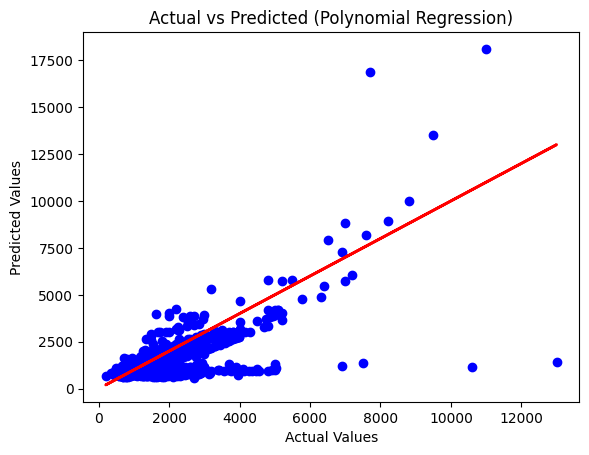

In [81]:
plt.scatter(y_test, y_test_predicted, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


**Model IV : Decision Tree Regressor**

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor(random_state=42,max_depth=12,min_samples_split=2)
dt.fit(X,Y)
dt_prediction = dt.predict(X_test)
dt_prediction_train = dt.predict(X)


mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt = metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt = np.sqrt(mse_dt)
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)


score4 = r2_score(Y, dt_prediction_train)
print("The accuracy of train model is {}%".format(round(score4, 5) * 100))
score44 = r2_score(y_test, dt_prediction)
print("The accuracy of test model is {}%".format(round(score44, 5) * 100))
print('Train Mean Square Error', metrics.mean_squared_error(Y, dt_prediction_train))
print('Test Mean Square Error', metrics.mean_squared_error(y_test, dt_prediction))

MAE: 165.95283332948048
MSE: 222869.43688588717
RMSE: 472.0904965002867
The accuracy of train model is 97.125%
The accuracy of test model is 73.36500000000001%
Train Mean Square Error 38348.2833768614
Test Mean Square Error 222869.43688588717


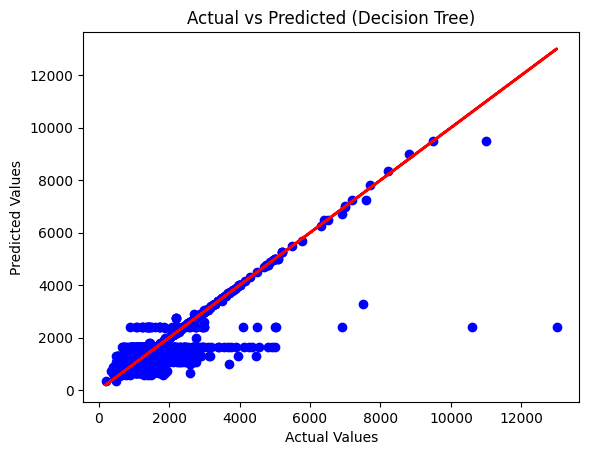

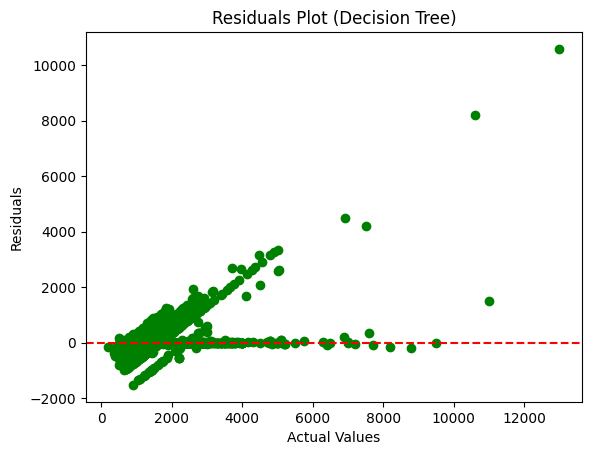

In [83]:
plt.scatter(y_test, dt_prediction, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Actual vs Predicted (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


residuals_dt = y_test - dt_prediction.reshape(-1,1)


plt.scatter(y_test, residuals_dt, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

**Model V : Gradient Boosting Regressor**

In [84]:



# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [2, 3, 4],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }


GB_reg = GradientBoostingRegressor(n_estimators=300,random_state=42,min_samples_split=5)


GB_reg.fit(X, Y)


test_predict_gb = GB_reg.predict(X_test)
train_predict_gb = GB_reg.predict(X)


mae_GB = metrics.mean_absolute_error(y_test, test_predict_gb)
mse_GB = metrics.mean_squared_error(y_test, test_predict_gb)
rmse_GB = np.sqrt(mse_GB)
print('MAE:', mae_GB)
print('MSE:', mse_GB)
print('RMSE:', rmse_GB)


score7 = r2_score(Y, train_predict_gb)
print("The accuracy of train model is {}%".format(round(score7, 5) * 100))
score77 = r2_score(y_test, test_predict_gb)
print("The accuracy of test model is {}%".format(round(score77, 5) * 100))
print('Train Mean Square Error', metrics.mean_squared_error(Y, train_predict_gb))
print('Test Mean Square Error', metrics.mean_squared_error(y_test, test_predict_gb))

C:\Users\20127\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 169.88367454882527
MSE: 196617.99588007564
RMSE: 443.41627832103285
The accuracy of train model is 96.358%
The accuracy of test model is 76.50200000000001%
Train Mean Square Error 48586.83175972916
Test Mean Square Error 196617.99588007564


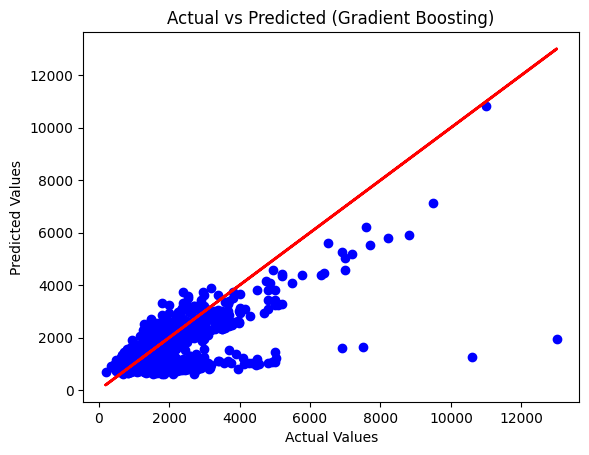

In [85]:
plt.scatter(y_test, test_predict, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Actual vs Predicted (Gradient Boosting)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**Model VII :Random Forest**

In [86]:
rf = RandomForestRegressor(random_state=42,n_estimators=250,max_depth=10)

rf.fit(X, Y)

rf_prediction = rf.predict(X_test)
train_predict = rf.predict(X)


mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf = metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf = np.sqrt(mse_rf)
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)


score2 = r2_score(Y, train_predict)
print("The accuracy of train model is {}%".format(round(score2, 5) * 100))
score22 = r2_score(y_test, rf_prediction)
print("The accuracy of test model is {}%".format(round(score22, 5) * 100))
print('Train Mean Square Error', metrics.mean_squared_error(Y, train_predict))
print('Test Mean Square Error', metrics.mean_squared_error(y_test, rf_prediction))

C:\Users\20127\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 162.95474333111213
MSE: 205012.1035894625
RMSE: 452.7826228881388
The accuracy of train model is 91.644%
The accuracy of test model is 75.49900000000001%
Train Mean Square Error 111467.05862600246
Test Mean Square Error 205012.1035894625


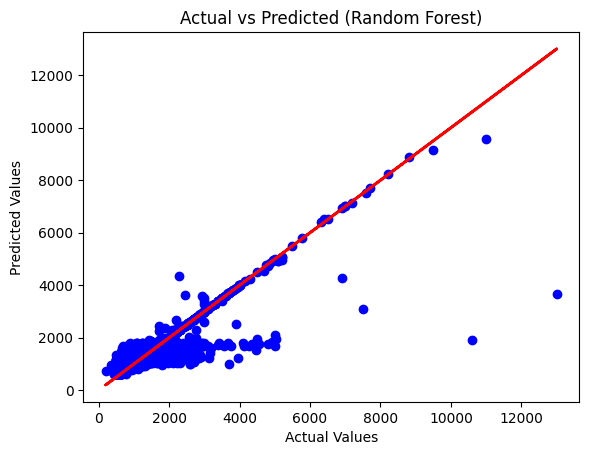

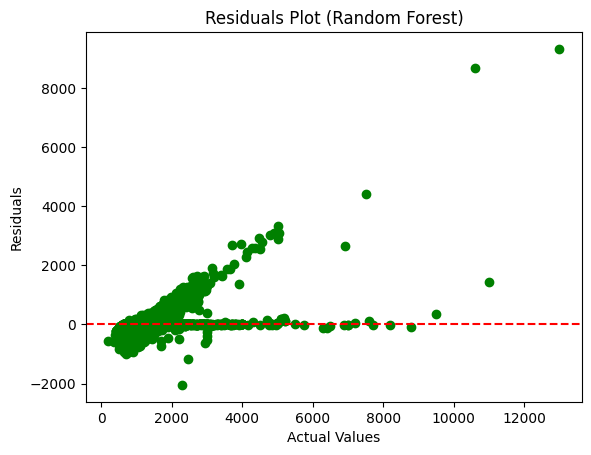

In [87]:
plt.scatter(y_test, rf_prediction, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


residuals = y_test - rf_prediction.reshape(-1, 1)


plt.scatter(y_test, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

**Model VIII: XGBoost**

In [88]:
xgb_model = xgb.XGBRegressor(n_estimators=50)


xgb_model.fit(X, Y)



y_train_predicted_xgb = xgb_model.predict(X)
y_test_predicted_xgb = xgb_model.predict(X_test)

mae_xgb = metrics.mean_absolute_error(y_test, y_test_predicted_xgb)
mse_xgb = metrics.mean_squared_error(y_test, y_test_predicted_xgb)
rmse_xgb = np.sqrt(mse_xgb)

score_train_xgb = r2_score(Y, y_train_predicted_xgb)
score_test_xgb = r2_score(y_test, y_test_predicted_xgb)

print('MAE (XGBoost):', mae_xgb)
print('MSE (XGBoost):', mse_xgb)
print('RMSE (XGBoost):', rmse_xgb)
score8 = r2_score(Y, y_train_predicted_xgb)
print("The accuracy of train model is {}%".format(round(score8, 5) * 100))
score88 = r2_score(y_test, y_test_predicted_xgb)
print("The accuracy of test model is {}%".format(round(score88, 5) * 100))

print('Train Mean Square Error', metrics.mean_squared_error(Y, y_train_predicted_xgb))
print('Test Mean Square Error', metrics.mean_squared_error(y_test, y_test_predicted_xgb))

MAE (XGBoost): 176.08733305754484
MSE (XGBoost): 235610.93867743167
RMSE (XGBoost): 485.3977118584632
The accuracy of train model is 97.318%
The accuracy of test model is 71.842%
Train Mean Square Error 35777.70568473378
Test Mean Square Error 235610.93867743167


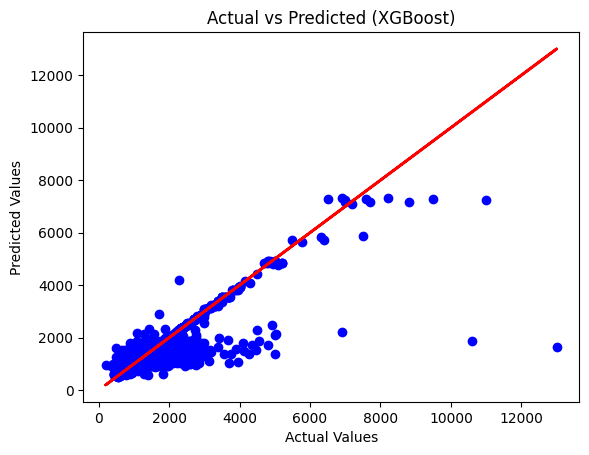

In [89]:
plt.scatter(y_test, y_test_predicted_xgb, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Actual vs Predicted (XGBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**SAVING MODELS**

In [90]:
##################Saving#################
############Saving the models#########
rf_model_path = 'rf_regr.joblib'
dt_model_path = 'dt_regr.joblib'
gb_model_path = 'gb_regr.joblib'
poly_model_path='poly_regr.joblib'
xgb_model_path='xgb_regr.joblib'


dump(rf, rf_model_path)
dump(dt, dt_model_path)
dump(GB_reg, gb_model_path)
dump(poly_model, poly_model_path)
dump(xgb_model, xgb_model_path)


print("Models saved successfully!")

Models saved successfully!


In [91]:
rf = load('rf_regr.joblib')
dt= load('dt_regr.joblib')
GB_reg = load('gb_regr.joblib')
poly_model = load('poly_regr.joblib')
xgb_model = load('xgb_regr.joblib')
print("Models loaded successfully!")

Models loaded successfully!


8.Evaluating the models different results (Accuarcy) also explaining the differences.

In [92]:
evaluation_metrics = {
    'Model': ['Linear Regression','EnhancedLRwithCV', 'Ridge Regression', 'Polynomial Regression', 'Gradient Boosting','Random Forest', 'Decision Tree','XGBoost'],
    'MAE': [mae_lr,mae_lrcv, mae_ridge, mae_poly, mae_GB, mae_rf, mae_dt,mae_xgb],
    'MSE': [mse_lr,mse_lrcv, mse_ridge, mse_poly, mse_GB, mse_rf, mse_dt,mse_xgb],
    'RMSE': [rmse_lr, rmse_lrcv,rmse_ridge, rmse_poly, rmse_GB,  rmse_rf, rmse_dt,rmse_xgb],
    'R-squared (Training)': [score1,r2_training_cv, score5, score6, score7, score2, score4,score8],
    'R-squared (Testing)': [score11,mean_r2_scores_cv, score55, score66, score77, score22, score44,score88]
}

dff = pd.DataFrame(evaluation_metrics)
dff.set_index('Model', inplace=True)

dff

,MAE,MSE,RMSE,R-squared (Training),R-squared (Testing)
Model,,,,,
Linear Regression,425.931639,465155.805475,682.023317,0.397503,0.444099
EnhancedLRwithCV,442.972759,815533.048800,903.068684,0.397503,0.446604
Ridge Regression,426.365013,464259.179011,681.365672,0.397469,0.445170
Polynomial Regression,395.498570,512469.923980,715.870047,0.548429,0.387554
Gradient Boosting,169.883675,196617.995880,443.416278,0.963578,0.765024
Random Forest,162.954743,205012.103589,452.782623,0.916440,0.754993
Decision Tree,165.952833,222869.436886,472.090497,0.971253,0.733652
XGBoost,176.087333,235610.938677,485.397712,0.973180,0.718425


9.Visualizing the models with different plots

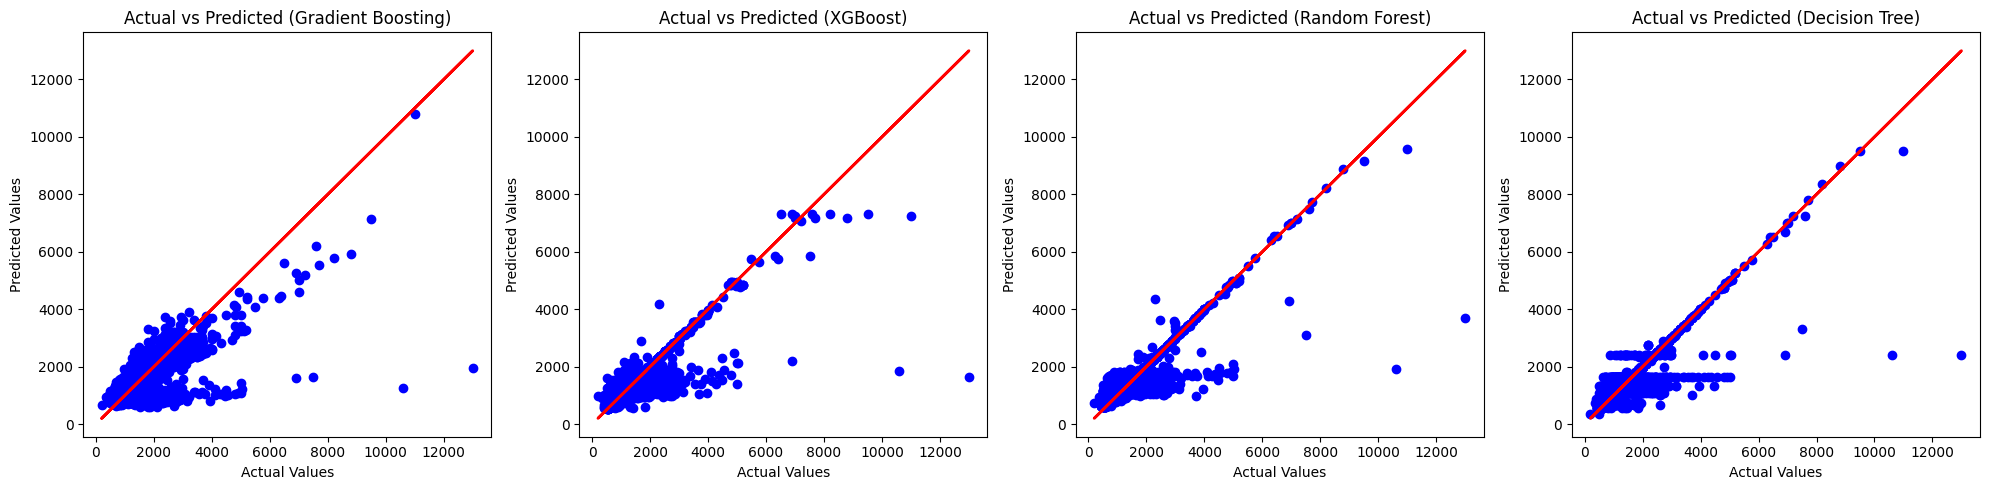

In [93]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].scatter(y_test, test_predict, color='blue')
axes[0].plot(y_test, y_test, color='red', linewidth=2)
axes[0].set_title('Actual vs Predicted (Gradient Boosting)')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')

axes[1].scatter(y_test, y_test_predicted_xgb, color='blue')
axes[1].plot(y_test, y_test, color='red', linewidth=2)
axes[1].set_title('Actual vs Predicted (XGBoost)')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')

axes[2].scatter(y_test, rf_prediction, color='blue')
axes[2].plot(y_test, y_test, color='red', linewidth=2)
axes[2].set_title('Actual vs Predicted (Random Forest)')
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')

axes[3].scatter(y_test, dt_prediction, color='blue')
axes[3].plot(y_test, y_test, color='red', linewidth=2)
axes[3].set_title('Actual vs Predicted (Decision Tree)')
axes[3].set_xlabel('Actual Values')
axes[3].set_ylabel('Predicted Values')


plt.tight_layout()


plt.show()

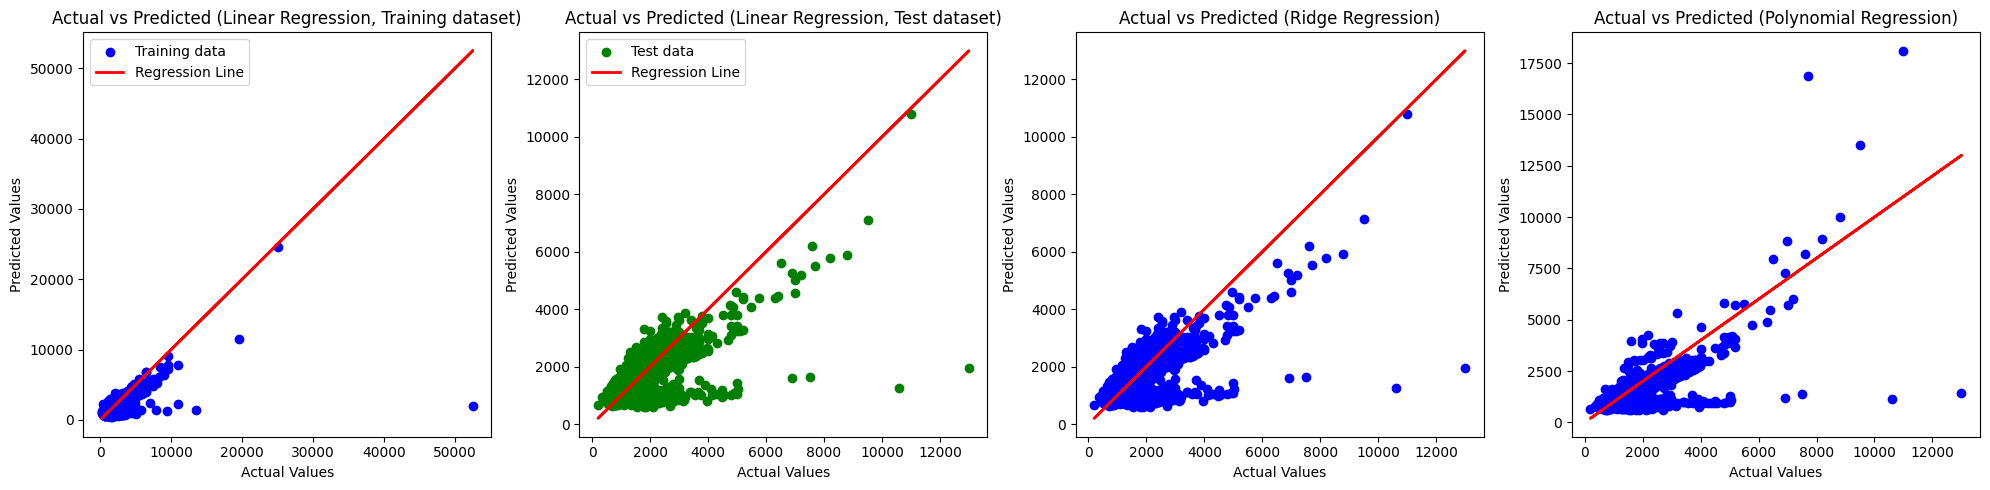

In [94]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))


axes[0].scatter(y_train, train_prediction, color='blue', label='Training data')
axes[0].plot(y_train, y_train, color='red', linewidth=2, label='Regression Line')
axes[0].set_title('Actual vs Predicted (Linear Regression, Training dataset)')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].legend()


axes[1].scatter(y_test, test_prediction, color='green', label='Test data')
axes[1].plot(y_test, y_test, color='red', linewidth=2, label='Regression Line')
axes[1].set_title('Actual vs Predicted (Linear Regression, Test dataset)')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].legend()


axes[2].scatter(y_test, test_predict, color='blue')
axes[2].plot(y_test, y_test, color='red', linewidth=2)
axes[2].set_title('Actual vs Predicted (Ridge Regression)')
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')


axes[3].scatter(y_test, y_test_predicted, color='blue')
axes[3].plot(y_test, y_test, color='red', linewidth=2)
axes[3].set_title('Actual vs Predicted (Polynomial Regression)')
axes[3].set_xlabel('Actual Values')
axes[3].set_ylabel('Predicted Values')


plt.tight_layout()


plt.show()


All libraries used versions

In [95]:
library_versions = [
    ("pandas", pd.__version__),
    ("numpy", np.__version__),
    ("seaborn", sns.__version__),
    ("matplotlib", plt.matplotlib.__version__),
    ("scikit-learn", sklearn.__version__),
    ("mpl_toolkits.mplot3d", "N/A"),  # Axes3D is part of matplotlib, no separate version
    ("itertools", "Built-in"),        # itertools is a built-in module, no version
    ("math", "Built-in"),             # math is a built-in module, no version
    ("LabelEncoder", "Built-in"),     # LabelEncoder is part of scikit-learn, no separate version
    ("linear_model", sklearn.__version__), 
    ("metrics", sklearn.__version__), 
    ("train_test_split", sklearn.__version__), 
    ("ExtraTreesClassifier", sklearn.__version__), 
    ("PolynomialFeatures", sklearn.__version__), 
    ("Ridge", sklearn.__version__), 
    ("DecisionTreeRegressor", sklearn.__version__), 
    ("GradientBoostingRegressor", sklearn.__version__), 
    ("RandomForestRegressor", sklearn.__version__), 
    ("r2_score", sklearn.__version__), 
    ("StandardScaler", sklearn.__version__), 
    ("XGBoost", xgb.__version__)
]

for lib, version in library_versions:
    print(f"{lib} version: {version}")

pandas version: 2.0.3
numpy version: 1.25.1
seaborn version: 0.12.2
matplotlib version: 3.7.2
scikit-learn version: 1.3.0
mpl_toolkits.mplot3d version: N/A
itertools version: Built-in
math version: Built-in
LabelEncoder version: Built-in
linear_model version: 1.3.0
metrics version: 1.3.0
train_test_split version: 1.3.0
ExtraTreesClassifier version: 1.3.0
PolynomialFeatures version: 1.3.0
Ridge version: 1.3.0
DecisionTreeRegressor version: 1.3.0
GradientBoostingRegressor version: 1.3.0
RandomForestRegressor version: 1.3.0
r2_score version: 1.3.0
StandardScaler version: 1.3.0
XGBoost version: 2.0.3


In [96]:
####################### THE Script############################
################################THE SCRIPT#######################################
def encode_with_unknown(label_encoder, column):
    # Replace unseen categories with -1
    encoded = column.apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)
    return encoded
def preprocess_data(new):
    new = new.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    
    # Fill null values
    new['amenities'] = new['amenities'].fillna(0)
    new['square_feet'] = new['square_feet'].fillna(d5)
    new['bedrooms'] = new['bedrooms'].fillna(X_train['bedrooms'].mode().iloc[0])
    new['bathrooms'] = new['bathrooms'].fillna(X_train['bathrooms'].mode().iloc[0])
    new['pets_allowed'] = new['pets_allowed'].fillna('No').apply(lambda x: 'Yes' if x != 'No' else x)
    new['address'] = new['address'].fillna("Unknown")
    new['cityname'] = new['cityname'].fillna(d1)
    new['state'] = new['state'].fillna(d2)
    new['latitude'] = new['latitude'].fillna(X_train['latitude'].mean())
    new['longitude'] = new['longitude'].fillna(X_train['longitude'].mean())
    new['price_type'] = new['price_type'].replace({'Weekly': 'Monthly', 'Monthly|Weekly': 'Monthly'})
    new['category'] = new['category'].replace({'housing/rent/short_term': 'housing/rent/apartment', 'housing/rent/home': 'housing/rent/apartment'})
    new['bedrooms']=new['bedrooms'].replace(0,1)

    
    # Extract price from body column
    new['extracted_price'] = new['body'].apply(extract_price_df)
    new['extracted_price'] = new['extracted_price'].astype(np.float64)
    
    # Encode amenities
    if new['amenities'].dtype == object:
        new['amenities'] = new['amenities'].apply(encode_amenities)
    
    # Label encoding
    label_encoder = load('le.joblib')  # Load label encoder
    new['source'] = encode_with_unknown(label_encoder, new['source'])
    new['price_type'] = encode_with_unknown(label_encoder, new['price_type'])
    new['address'] = encode_with_unknown(label_encoder, new['address'])
    new['body'] = encode_with_unknown(label_encoder, new['body'])
    new['title'] = encode_with_unknown(label_encoder, new['title'])
    new['pets_allowed'] = encode_with_unknown(label_encoder, new['pets_allowed'])
    new['has_photo'] = encode_with_unknown(label_encoder, new['has_photo'])
    new['fee'] = encode_with_unknown(label_encoder, new['fee'])
    new['currency'] = encode_with_unknown(label_encoder, new['currency'])
    
    
    # Drop unnecessary columns
    columns_to_drop = ['id', 'category', 'title', 'body', 'currency', 'fee', 'source', 'time','price_type','address']
    new = new.drop(columns=columns_to_drop)

    # Add new features
    new['NoOfRooms'] = new['bathrooms']+new['bedrooms']
    
    
    city_encoding = X_train.groupby(d4)['extracted_price'].mean().reset_index()
    city_encoding.columns = ['cityname', 'city_price_mean']
    new = pd.merge(new, city_encoding, on='cityname', how='left')
    new['cityname']=new['city_price_mean']
    new.drop(['city_price_mean'], axis=1, inplace=True)
    new['cityname']=new['cityname'].fillna(mostcity)

    #grouping the state according to its names and replacing with the avg price of each state
    state_encoding = X_train.groupby(d3)['extracted_price'].mean().reset_index()
    state_encoding.columns = ['state', 'state_price_mean']
    new = pd.merge(new, state_encoding, on='state', how='left')
    new['state']=new['state_price_mean']
    new.drop(['state_price_mean'], axis=1, inplace=True)
    new['state'] =new['state'].fillna(moststate)
    new = new.rename(columns={'cityname': 'CityavgRentprice', 'state': 'StateavgRentprice'})
    #new['AvgAreaPrice'] = X_train.groupby(['longitude', 'latitude'])['extracted_price'].transform('mean')
    ##############New Feature ALERTTTTT############ AvgAreaState
    X_train['longitude_range'] = pd.cut(X_train['longitude'], bins=10)
    X_train['latitude_range'] = pd.cut(X_train['latitude'], bins=10)

    
    range_means = X_train.groupby(['longitude_range', 'latitude_range'])['extracted_price'].mean()


    new['AvgAreaPrice'] = X_train.groupby(['longitude_range', 'latitude_range'])['extracted_price'].transform('mean')
    
    X_train.drop(['longitude_range', 'latitude_range'], axis=1, inplace=True)
    new['CityStateAvg'] = (new['CityavgRentprice'] + new['StateavgRentprice']) / 2
    bath_encoding = X_train.groupby('bathrooms')['extracted_price'].mean().reset_index()
    bath_encoding.columns = ['bathrooms', 'avgBathroomsPrice']
    new = pd.merge(new, bath_encoding, on='bathrooms', how='left')
    new["avgBathroomsPrice"]= new["avgBathroomsPrice"].fillna(mostBath)

    new['Trial'] = new['CityavgRentprice'] + new['square_feet'] / 2 + new['avgBathroomsPrice'] / 3 + new['bedrooms'] * 20

    X = new[['bathrooms', 'square_feet', 'CityavgRentprice', 'extracted_price',
       'CityStateAvg', 'Trial']]
    new['price_display'] = new['price_display'].str.replace(r'[^0-9.]', '', regex=True).astype(np.int64)
    y=new['price_display']
    y.reset_index(drop=True, inplace=True)
    # Scale features
    scaler = load('sc_regr.joblib')
    X_scaled = scaler.transform(X)
    
    return X_scaled,y


def test_model(dl):
    X, y = preprocess_data(dl)  
    model1 = load('rf_regr.joblib')  
    y_pred1 = model1.predict(X)
    model2 = load('xgb_regr.joblib')  
    y_pred2 = model2.predict(X)
    model3 = load('gb_regr.joblib') 
    y_pred3 = model3.predict(X)

    score1 = r2_score(y,y_pred1)
    print("actual",y)
    print("predicted",y_pred1)
    print("The accuracy of test model 1 RF is {}%".format(round(score1, 5) *100))
    print('Test Mean Square Error for model 1 RF', metrics.mean_squared_error(y, y_pred1))
    score2 = r2_score(y,y_pred2)
    print("The accuracy of test model 2 XGB is {}%".format(round(score2, 5) *100))
    print('Test Mean Square Error for model 2 XGB', metrics.mean_squared_error(y, y_pred2))
    score3 = r2_score(y,y_pred3)
    print("The accuracy of test model 3 GB is {}%".format(round(score3, 5) *100))
    print('Test Mean Square Error for model 3 GB', metrics.mean_squared_error(y, y_pred3))

    return X,y



In [97]:
#################NEWW DATA HERE##############
new_df = pd.read_csv("ms1trythef.csv")
x,y=test_model(new_df)

actual 0       2150
1       1415
2       1195
3       1580
4        870
        ... 
2997    2099
2998    2017
2999    1595
3000    1451
3001     850
Name: price_display, Length: 3002, dtype: int64
predicted [2150.42365084 1424.88319517 1193.75671512 ... 1595.35185154 1449.47545014
  854.73952884]
The accuracy of test model 1 RF is 81.664%
Test Mean Square Error for model 1 RF 193623.73199400585
The accuracy of test model 2 XGB is 79.598%
Test Mean Square Error for model 2 XGB 215439.39924952775
The accuracy of test model 3 GB is 83.326%
Test Mean Square Error for model 3 GB 176077.77701644832


C:\Users\20127\AppData\Local\Temp\ipykernel_24128\1848221341.py:85: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  new = pd.merge(new, bath_encoding, on='bathrooms', how='left')
